<a href="https://colab.research.google.com/github/fabiansep/TalentOps/blob/main/m2_e10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Configurar estilo
plt.style.use('default')
sns.set_palette("husl")

# Generar datos de ventas
np.random.seed(42)
n_registros = 1000

ventas_data = pd.DataFrame({
    'fecha': pd.date_range('2024-01-01', periods=n_registros, freq='D'),
    'ventas': np.random.normal(1500, 300, n_registros).clip(min=0),
    'margen': np.random.normal(0.25, 0.05, n_registros).clip(0.1, 0.4),
    'region': np.random.choice(['Norte', 'Sur', 'Este', 'Oeste'], n_registros),
    'categoria': np.random.choice(['Electrónicos', 'Ropa', 'Hogar', 'Deportes'], n_registros),
    'cliente_tipo': np.random.choice(['Regular', 'VIP', 'Nuevo'], n_registros,
                                   p=[0.7, 0.2, 0.1])
})

# Calcular métricas derivadas
ventas_data['beneficio'] = ventas_data['ventas'] * ventas_data['margen']
ventas_data['mes'] = ventas_data['fecha'].dt.to_period('M')

print("Datos preparados para visualización:")
print(ventas_data.head())
print(f"\nTotal registros: {len(ventas_data)}")

Datos preparados para visualización:
       fecha       ventas    margen region categoria cliente_tipo   beneficio  \
0 2024-01-01  1649.014246  0.319968    Sur  Deportes      Regular  527.631414   
1 2024-01-02  1458.520710  0.296232   Este     Hogar      Regular  432.060046   
2 2024-01-03  1694.306561  0.252982    Sur     Hogar          VIP  428.628247   
3 2024-01-04  1956.908957  0.217653   Este     Hogar      Regular  425.927420   
4 2024-01-05  1429.753988  0.284911   Este      Ropa      Regular  407.352875   

       mes  
0  2024-01  
1  2024-01  
2  2024-01  
3  2024-01  
4  2024-01  

Total registros: 1000


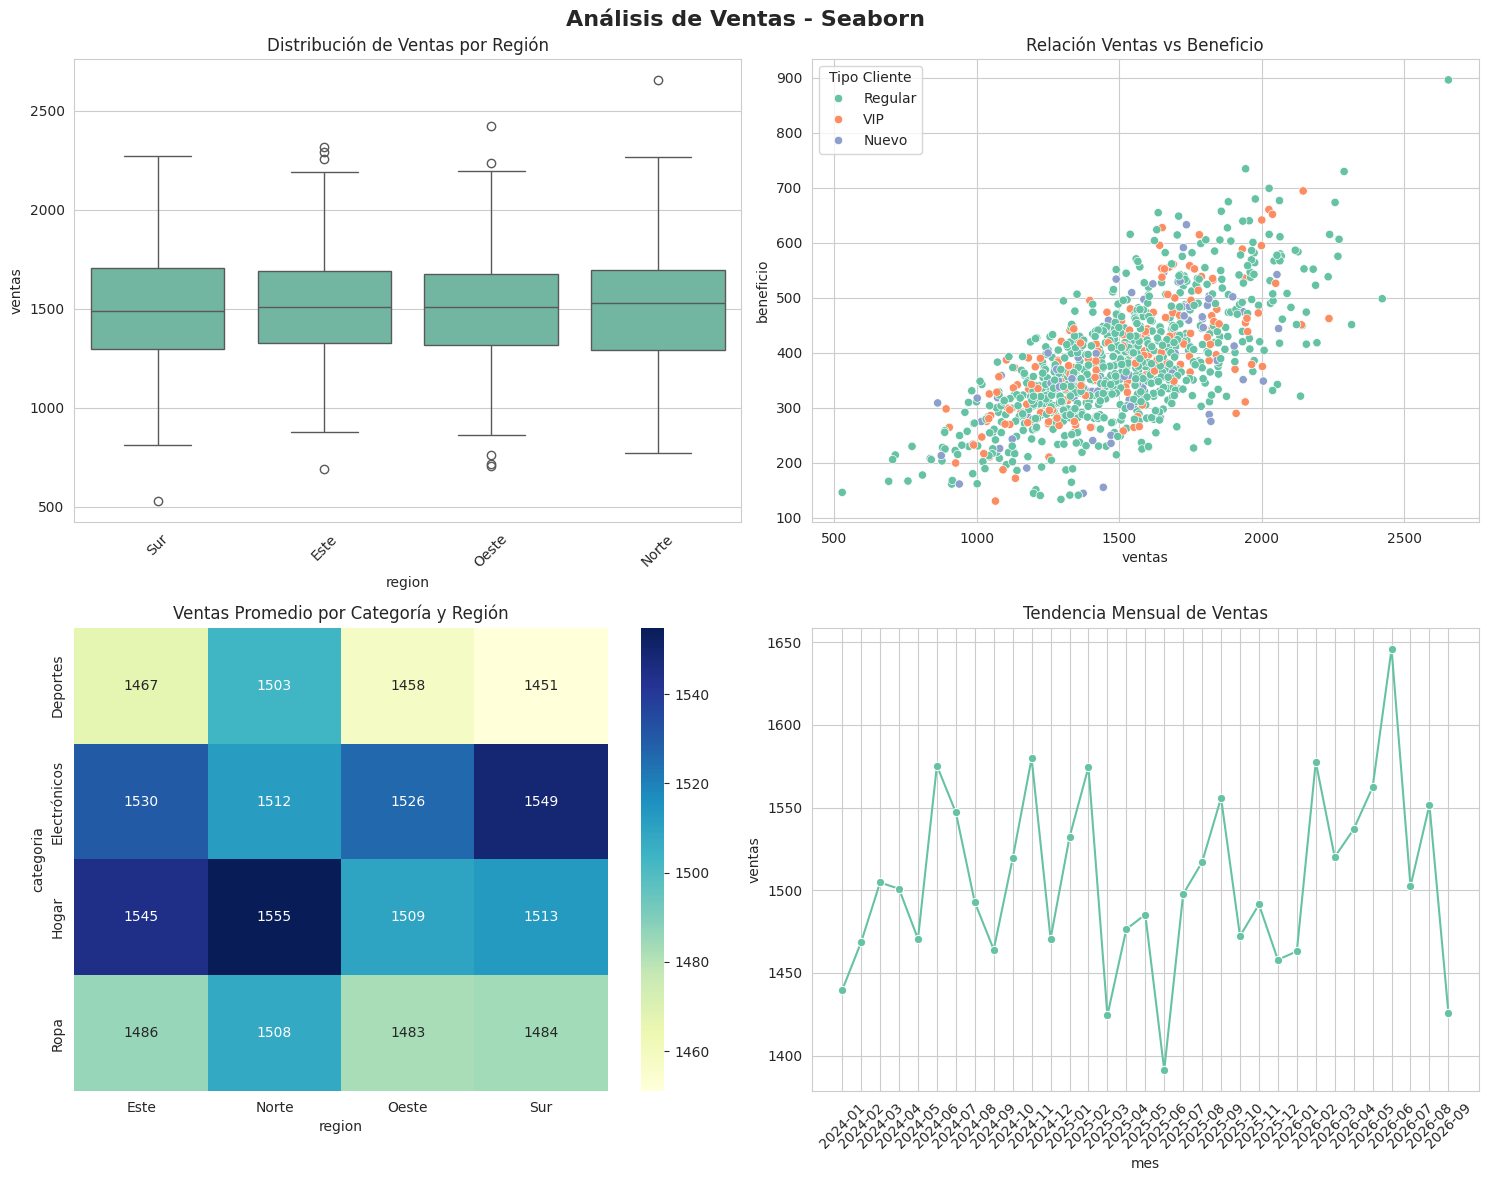

✅ Visualización con Seaborn completada


In [2]:
# Configurar Seaborn
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Crear figura con múltiples subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis de Ventas - Seaborn', fontsize=16, fontweight='bold')

# 1. Distribución de ventas por región
sns.boxplot(data=ventas_data, x='region', y='ventas', ax=axes[0,0])
axes[0,0].set_title('Distribución de Ventas por Región')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Relación ventas vs beneficio
sns.scatterplot(data=ventas_data, x='ventas', y='beneficio',
                hue='cliente_tipo', ax=axes[0,1])
axes[0,1].set_title('Relación Ventas vs Beneficio')
axes[0,1].legend(title='Tipo Cliente')

# 3. Ventas promedio por categoría y región
pivot_data = ventas_data.pivot_table(
    values='ventas', index='categoria', columns='region', aggfunc='mean'
)
sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='YlGnBu', ax=axes[1,0])
axes[1,0].set_title('Ventas Promedio por Categoría y Región')

# 4. Tendencia mensual de ventas
ventas_mensuales = ventas_data.groupby('mes')['ventas'].mean().reset_index()
ventas_mensuales['mes'] = ventas_mensuales['mes'].astype(str)
sns.lineplot(data=ventas_mensuales, x='mes', y='ventas', marker='o', ax=axes[1,1])
axes[1,1].set_title('Tendencia Mensual de Ventas')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("✅ Visualización con Seaborn completada")

In [3]:
# Crear dashboard interactivo con Plotly
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Ventas por Región', 'Distribución por Categoría',
                   'Tendencia Temporal', 'Beneficio vs Ventas'),
    specs=[[{'type': 'bar'}, {'type': 'pie'}],
           [{'type': 'scatter'}, {'type': 'scatter'}]]
)

# 1. Ventas por región (barra interactiva)
ventas_region = ventas_data.groupby('region')['ventas'].sum().reset_index()
fig.add_trace(
    go.Bar(x=ventas_region['region'], y=ventas_region['ventas'],
           name='Ventas por Región', marker_color='lightblue'),
    row=1, col=1
)

# 2. Distribución por categoría (pie interactivo)
ventas_categoria = ventas_data.groupby('categoria')['ventas'].sum().reset_index()
fig.add_trace(
    go.Pie(labels=ventas_categoria['categoria'], values=ventas_categoria['ventas'],
           name='Por Categoría', title='Distribución por Categoría'),
    row=1, col=2
)

# 3. Tendencia temporal (línea interactiva)
ventas_tiempo = ventas_data.groupby('mes')['ventas'].mean().reset_index()
ventas_tiempo['mes'] = ventas_tiempo['mes'].astype(str)
fig.add_trace(
    go.Scatter(x=ventas_tiempo['mes'], y=ventas_tiempo['ventas'],
              mode='lines+markers', name='Tendencia Mensual',
              line=dict(color='red', width=3)),
    row=2, col=1
)

# 4. Beneficio vs Ventas (scatter interactivo)
fig.add_trace(
    go.Scatter(x=ventas_data['ventas'], y=ventas_data['beneficio'],
              mode='markers', name='Beneficio vs Ventas',
              marker=dict(color=ventas_data['margen'], colorscale='Viridis',
                        showscale=True, colorbar=dict(title="Margen")),
              text=ventas_data['categoria']),
    row=2, col=2
)

# Configurar layout
fig.update_layout(
    title='Dashboard Interactivo de Ventas',
    height=800,
    showlegend=True,
    template='plotly_white'
)

# Configurar ejes
fig.update_xaxes(title_text="Región", row=1, col=1)
fig.update_yaxes(title_text="Ventas Totales", row=1, col=1)

fig.update_xaxes(title_text="Mes", row=2, col=1)
fig.update_yaxes(title_text="Ventas Promedio", row=2, col=1)

fig.update_xaxes(title_text="Ventas", row=2, col=2)
fig.update_yaxes(title_text="Beneficio", row=2, col=2)

fig.show()

print("✅ Dashboard interactivo con Plotly completado")

✅ Dashboard interactivo con Plotly completado


=== ANÁLISIS RÁPIDO CON PANDAS PLOTTING ===
Estadísticas descriptivas:
            ventas    beneficio       margen
count  1000.000000  1000.000000  1000.000000
mean   1505.799617   381.165730     0.253525
std     293.764781   104.937757     0.049823
min     527.619798   130.323987     0.102981
25%    1305.722908   314.235907     0.219688
50%    1507.590184   371.578356     0.253154
75%    1694.383163   442.942453     0.286444
max    2655.819447   896.282859     0.400000


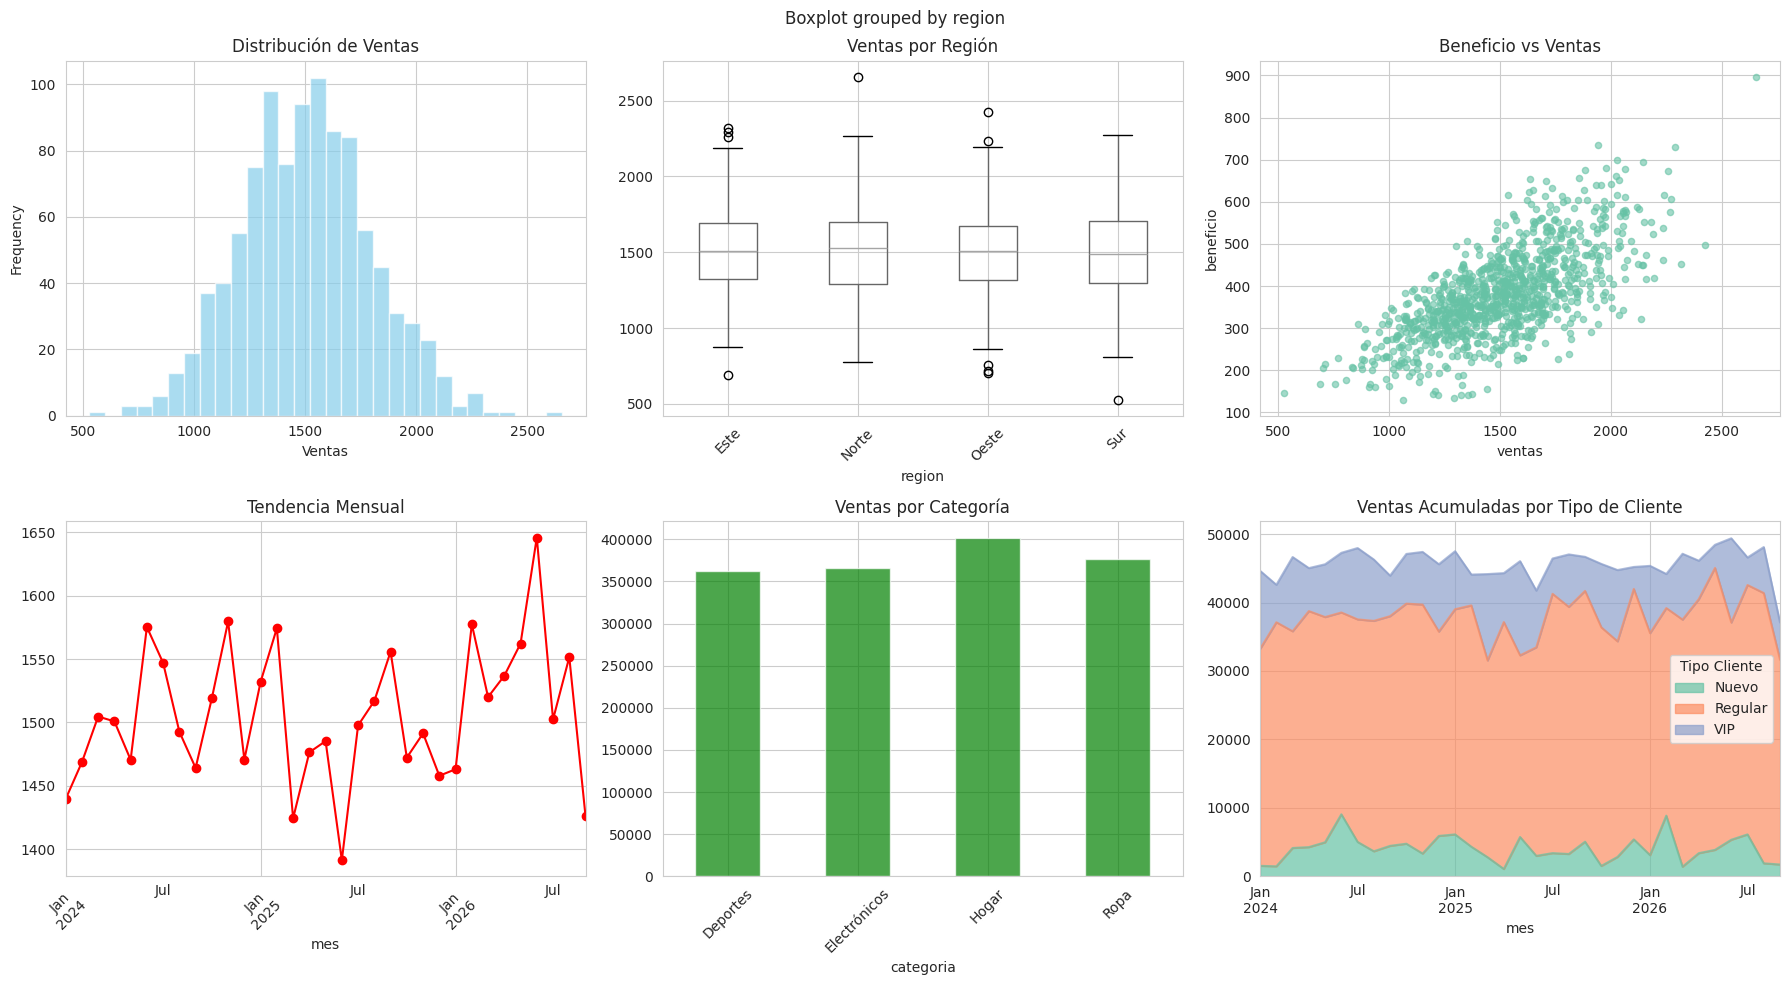

✅ Análisis exploratorio con Pandas plotting completado


In [4]:
# Análisis rápido con pandas plotting
print("=== ANÁLISIS RÁPIDO CON PANDAS PLOTTING ===")

# Estadísticas básicas
print("Estadísticas descriptivas:")
print(ventas_data[['ventas', 'beneficio', 'margen']].describe())

# Crear figura con subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Análisis Exploratorio Rápido - Pandas Plotting', fontsize=16)

# 1. Histograma de ventas
ventas_data['ventas'].plot.hist(bins=30, ax=axes[0,0], color='skyblue', alpha=0.7)
axes[0,0].set_title('Distribución de Ventas')
axes[0,0].set_xlabel('Ventas')

# 2. Box plot por región
ventas_data.boxplot(column='ventas', by='region', ax=axes[0,1])
axes[0,1].set_title('Ventas por Región')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Scatter plot beneficio vs ventas
ventas_data.plot.scatter(x='ventas', y='beneficio', ax=axes[0,2], alpha=0.6)
axes[0,2].set_title('Beneficio vs Ventas')

# 4. Línea de tendencia mensual
ventas_mensual = ventas_data.groupby('mes')['ventas'].mean()
ventas_mensual.plot(ax=axes[1,0], marker='o', color='red')
axes[1,0].set_title('Tendencia Mensual')
axes[1,0].tick_params(axis='x', rotation=45)

# 5. Barras por categoría
ventas_categoria = ventas_data.groupby('categoria')['ventas'].sum()
ventas_categoria.plot.bar(ax=axes[1,1], color='green', alpha=0.7)
axes[1,1].set_title('Ventas por Categoría')
axes[1,1].tick_params(axis='x', rotation=45)

# 6. Área acumulada por tipo de cliente
ventas_cliente = ventas_data.groupby(['mes', 'cliente_tipo'])['ventas'].sum().unstack()
ventas_cliente.plot.area(ax=axes[1,2], alpha=0.7)
axes[1,2].set_title('Ventas Acumuladas por Tipo de Cliente')
axes[1,2].legend(title='Tipo Cliente')

plt.tight_layout()
plt.show()

print("✅ Análisis exploratorio con Pandas plotting completado")